### Exercise (Normal Distribution and Z Score for Outlier Removal)
You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles
After removing outliers in step 1, you get a new dataframe.
On step(2) dataframe, use 4 standard deviation to remove outliers
Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram
On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [89]:
import pandas as pd
import seaborn as sns

In [90]:
df_data = pd.read_csv("C:/Users/pjpra/OneDrive/Desktop/My_Learnings/Learning_Statistics/E002_P_SD_Zscore_Outlier/bhp.csv")
df_data.dtypes

location           object
size               object
total_sqft        float64
bath              float64
price             float64
bhk                 int64
price_per_sqft      int64
dtype: object

#### a) Removing Outlier with Percentile

In [91]:
df_data.price_per_sqft.shape

(13200,)

In [92]:
lower = df_data.price_per_sqft.quantile(0.001)
upper = df_data.price_per_sqft.quantile(0.999)
df_percentile = df_data[(df_data['price_per_sqft'] > lower) & (df_data['price_per_sqft'] < upper)]

In [93]:
df_percentile.price_per_sqft.shape

(13172,)

#### b) Removing Outlier with Standard Deviation

In [94]:
upper = df_percentile.price_per_sqft.mean() + 4*df_percentile.price_per_sqft.std()
lower = df_percentile.price_per_sqft.mean() - 4*df_percentile.price_per_sqft.std()
lower, upper

(-9900.429065502582, 23227.73653589432)

In [95]:
df_sd = df_percentile[(df_percentile['price_per_sqft'] > lower) & (df_percentile['price_per_sqft'] < upper)]
df_sd.shape

(13047, 7)

<AxesSubplot: xlabel='price_per_sqft', ylabel='Count'>

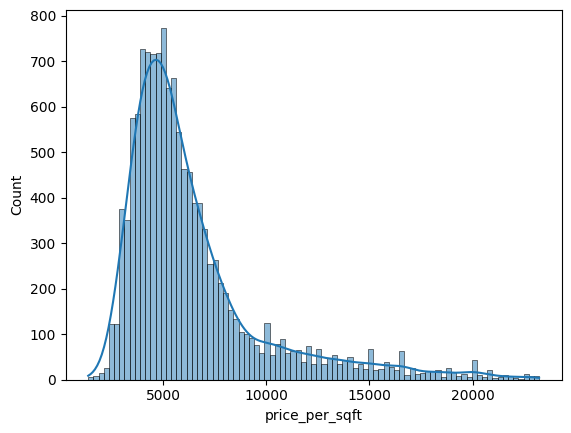

In [96]:
sns.histplot(df_sd.price_per_sqft, kde = True)

#### C) Outlier removal using Z score

In [97]:
df_zs = df_percentile
df_zs['z_score'] = ((df_zs['price_per_sqft'] - df_zs['price_per_sqft'].mean()) / df_zs['price_per_sqft'].std())

C:\Users\pjpra\AppData\Local\Temp\ipykernel_17540\2906812952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zs['z_score'] = ((df_zs['price_per_sqft'] - df_zs['price_per_sqft'].mean()) / df_zs['price_per_sqft'].std())


In [98]:
df_zs = df_zs[(df_zs['z_score'] > -4) & (df_zs['z_score'] < 4)]
df_zs.shape

(13047, 8)

<AxesSubplot: xlabel='price_per_sqft', ylabel='Count'>

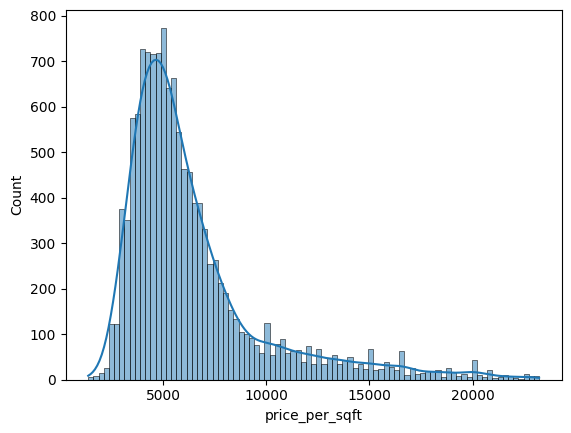

In [99]:
sns.histplot(df_zs.price_per_sqft, kde = True)